# Rex-Omni Object Detection Tutorial

This notebook demonstrates how to use Rex-Omni for object detection tasks (tasks that output in box format)

## Features
- Easy-to-use API with automatic model initialization
- Support for both Transformers and VLLM backends
- Built-in visualization capabilities
- Flexible configuration options

## Step 1: Initialize Rex Omni Model

In [2]:
# Import required libraries
import torch
from PIL import Image
from rex_omni import RexOmniWrapper, RexOmniVisualize
import matplotlib.pyplot as plt
import numpy as np

# Rex-Omni supports both Transformers and VLLM backends by switching the backend parameter.
model_path = "IDEA-Research/Rex-Omni"  # Replace with your model path

print("🚀 Initializing Rex Omni model...")

rex_model = RexOmniWrapper(
    model_path=model_path,
    backend="transformers",  # Choose "transformers" or "vllm"
    max_tokens=4096,
    temperature=0.0,
    top_p=0.05,
    top_k=1,
    repetition_penalty=1.05,
)

🚀 Initializing Rex Omni model...
Initializing transformers backend...


Loading checkpoint shards: 100%|██████████| 2/2 [00:04<00:00,  2.37s/it]


## Example 1: Object Detection

Let's load an image for object detection task. You can replace this with your own image path.

✅ Image loaded successfully!
📏 Image size: (1440, 810)


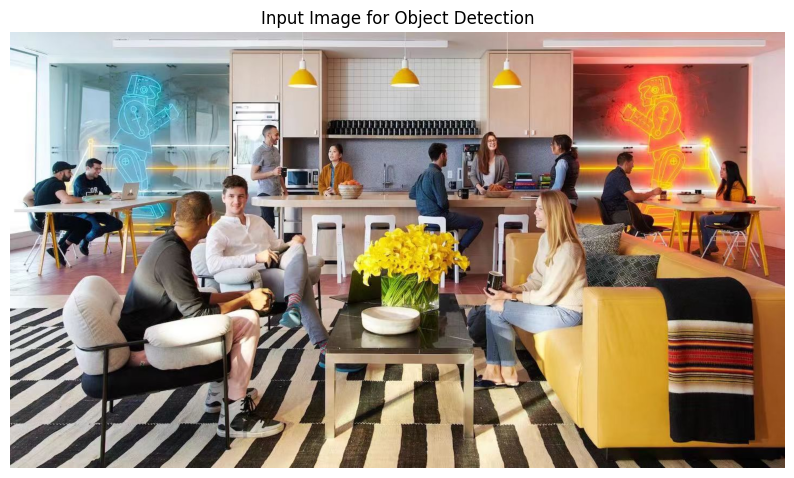

/home/jiangqing/miniconda3/envs/r1/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:631: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/home/jiangqing/miniconda3/envs/r1/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:636: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.05` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
/home/jiangqing/miniconda3/envs/r1/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:653: UserWarning: `do_sample` is set to `False`. However, `top_k` is set to `1` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_k`.
  warnings.warn(


In [3]:
# Load image
image_path = "test_images/cafe.jpg"  # Replace with your image path
image = Image.open(image_path).convert("RGB")
print(f"✅ Image loaded successfully!")
print(f"📏 Image size: {image.size}")

# Display the image
plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.axis('off')
plt.title('Input Image for Object Detection')
plt.show()

# Define categories to detect
categories = [
    "man",
    "woman",
    "yellow flower",
    "sofa",
    "robot-shope light",
    "blanket",
    "microwave",
    "laptop",
    "cup",
    "white chair",
    "lamp",
]

# inference
results = rex_model.inference(images=image, task="detection", categories=categories)

Lets check the output from Rex-Omni

In [28]:
for k, v in results[0].items():
    print(f'{k} : {v}')
    print('\n')

# Check the raw output form Rex-Omni


success : True


image_size : (1440, 810)


resized_size : (1428, 812)


task : detection


prompt : Detect man, woman, yellow flower, sofa, robot-shope light, blanket, microwave, laptop, cup, white chair, lamp. . Output the bounding box coordinates in [x0, y0, x1, y1] format.


raw_output : <|object_ref_start|>man<|object_ref_end|><|box_start|><23><294><106><525>,<80><286><146><515>,<69><363><357><936>,<251><327><457><781>,<308><212><362><461>,<512><252><612><551>,<763><270><842><467><|box_end|>, <|object_ref_start|>woman<|object_ref_end|><|box_start|><396><253><446><376>,<586><360><745><820>,<591><228><645><374>,<699><233><738><417>,<880><293><953><514><|box_end|>, <|object_ref_start|>yellow flower<|object_ref_end|><|box_start|><441><439><594><588><|box_end|>, <|object_ref_start|>sofa<|object_ref_end|><|box_start|><643><453><999><977><|box_end|>, <|object_ref_start|>robot-shape light<|object_ref_end|><|box_start|><128><95><218><259>,<771><96><876><254><|box_end|>, <|object_ref_start|

lets visualize the predicted results using RexOmniVisualize function

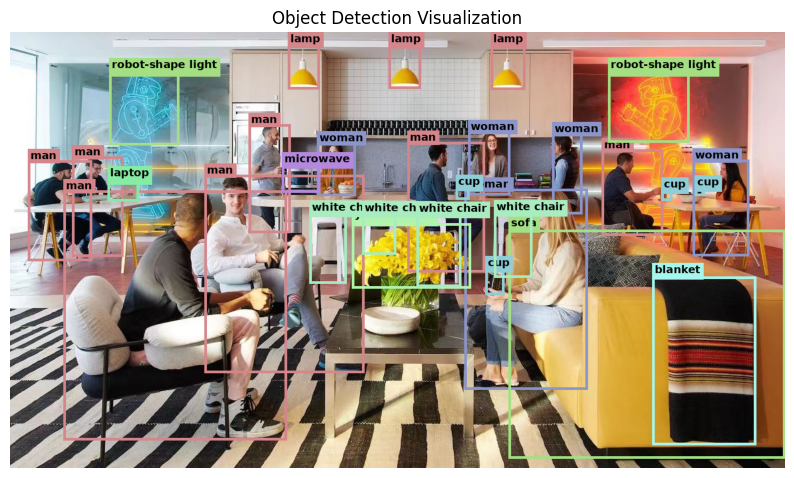

In [29]:

result = results[0]
if result["success"]:
    predictions = result["extracted_predictions"]
    vis_image = RexOmniVisualize(
        image=image,
        predictions=predictions,
        font_size=20,
        draw_width=5,
        show_labels=True,
    )
    # display the visualization
    plt.figure(figsize=(10, 8))
    plt.imshow(vis_image)
    plt.axis('off')
    plt.title('Object Detection Visualization')
    plt.show()

else:
    print(f"Inference failed: {result['error']}")

## Example 2: Object Referring Example

Let's trt some object referring examples


✅ Image loaded successfully!
📏 Image size: (1536, 1024)


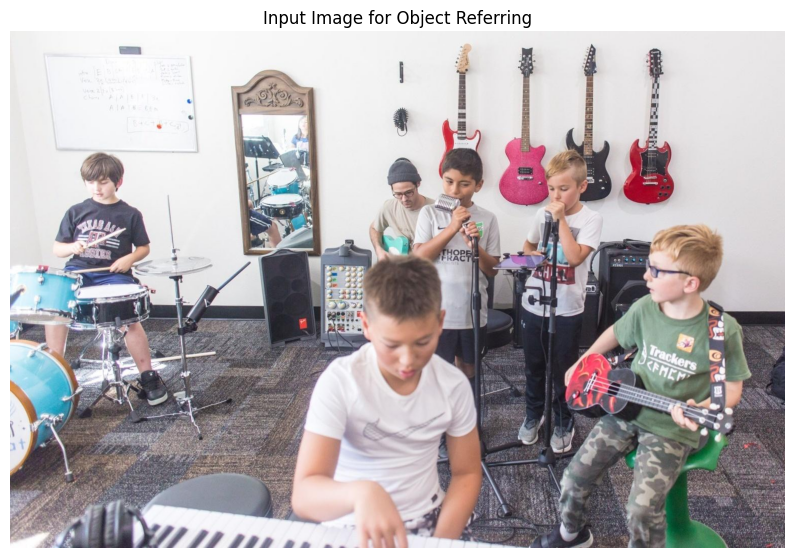

In [32]:
# Load image
image_path = "test_images/boys.jpg"  # Replace with your image path
image = Image.open(image_path).convert("RGB")
print(f"✅ Image loaded successfully!")
print(f"📏 Image size: {image.size}")

# Display the image
plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.axis("off")
plt.title("Input Image for Object Referring")
plt.show()

# Define categories to detect
categories = [
    "boys holding microphone",
    "boy playing piano",
    "the four guitars on the wall",
    "the guitar in someone's hand",
]

# inference
results = rex_model.inference(images=image, task="detection", categories=categories)

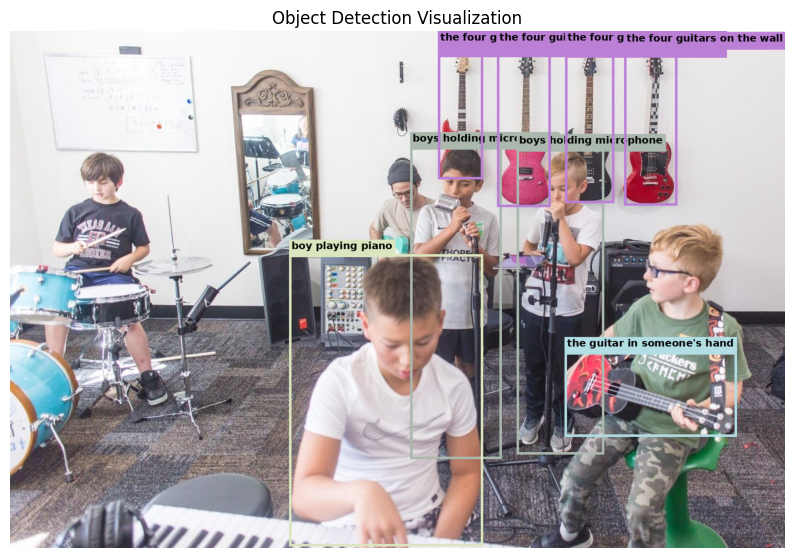

In [33]:
result = results[0]
if result["success"]:
    predictions = result["extracted_predictions"]
    vis_image = RexOmniVisualize(
        image=image,
        predictions=predictions,
        font_size=20,
        draw_width=5,
        show_labels=True,
    )
    # display the visualization
    plt.figure(figsize=(10, 8))
    plt.imshow(vis_image)
    plt.axis("off")
    plt.title("Object Referring Visualization")
    plt.show()

else:
    print(f"Inference failed: {result['error']}")

## Example 3: Layout Grounding Example

Let's trt some Layout Grouhnding Example

✅ Image loaded successfully!
📏 Image size: (622, 979)


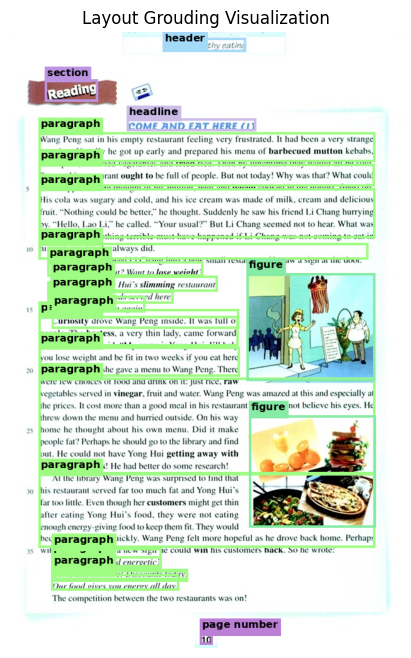

In [35]:
# Load image
image_path = "test_images/layout.jpg"  # Replace with your image path
image = Image.open(image_path).convert("RGB")
print(f"✅ Image loaded successfully!")
print(f"📏 Image size: {image.size}")

# Define categories to detect
categories = [
    "header", "headline", "paragraph", "page number", "figure", "section"
]

# inference
results = rex_model.inference(images=image, task="detection", categories=categories)

result = results[0]
if result["success"]:
    predictions = result["extracted_predictions"]
    vis_image = RexOmniVisualize(
        image=image,
        predictions=predictions,
        font_size=16,
        draw_width=4,
        show_labels=True,
    )
    # display the visualization
    plt.figure(figsize=(10, 8))
    plt.imshow(vis_image)
    plt.axis("off")
    plt.title("Layout Grouding Visualization")
    plt.show()

else:
    print(f"Inference failed: {result['error']}")

## Example 4: GUI Grounding Example

Let's trt some GUI Grouhnding Example

✅ Image loaded successfully!
📏 Image size: (1900, 1728)


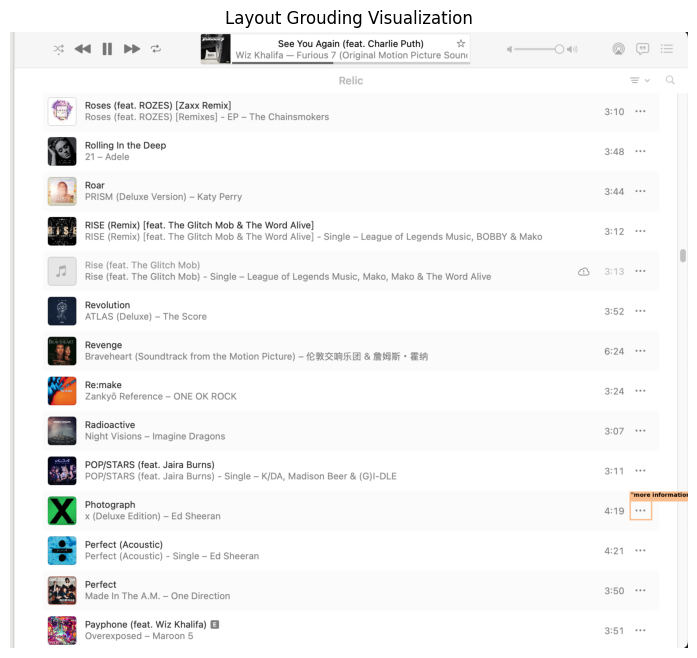

In [5]:
# Load image
image_path = "test_images/gui.png"  # Replace with your image path
image = Image.open(image_path).convert("RGB")
print(f"✅ Image loaded successfully!")
print(f"📏 Image size: {image.size}")

# Define categories to detect
categories = ["more information of song 'Photograph'"]

# inference
results = rex_model.inference(images=image, task="gui_grounding", categories=categories)

result = results[0]
if result["success"]:
    predictions = result["extracted_predictions"]
    vis_image = RexOmniVisualize(
        image=image,
        predictions=predictions,
        font_size=16,
        draw_width=4,
        show_labels=True,
    )
    # display the visualization
    plt.figure(figsize=(10, 8))
    plt.imshow(vis_image)
    plt.axis("off")
    plt.title("Layout Grouding Visualization")
    plt.show()

else:
    print(f"Inference failed: {result['error']}")